In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
from itertools import islice
from ge_liu_2021 import Model, plot_state, animate, RK4update

In [36]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

*Foraging behaviours lead to spatiotemporal self-similar dynamics in grazing ecosystems* by Zhenpeng Ge and Quan-Xing Liu (paper)[https://doi.org/10.1111/ele.13928]

The model
\begin{align*}
    p_t &= \lambda p(1-p) - ph + \Delta p \\
    h_t &= D_0 \nabla \cdot \big[ v^2 \nabla h + h v v' \nabla p - \kappa \nabla (\Delta h) \big] \\
    v(p) &= \alpha p^2 + \beta p + 1
\end{align*}

# Movie S1

In [9]:
model_params = {
    'α': 6,
    'β' : -3,
    'κ' : .05,
    'λ' : 1,
    'D0' : 1,
    'stocking_rate': .6
}

spatial_params ={
    'x_left': 0,
    'Δx': 1,
    'spatial_points': 512
}
time_params = {
    't0': 0,
    'Δt': 0.02
}

params = {**model_params, **spatial_params, ** time_params}

model = Model(**params)

In [13]:
steps = 200_000
stride = 500
print(f'Storing {steps//stride} snapshots...')
us = []
for t, u in islice(model.simulate(), 0, steps, stride):
    print(f'{t/(model.Δt*steps)*100:.2f}%' + ' '*50, end='\r')
    us.append(u)
print('Complete')

Storing 400 values...
Complete                                                


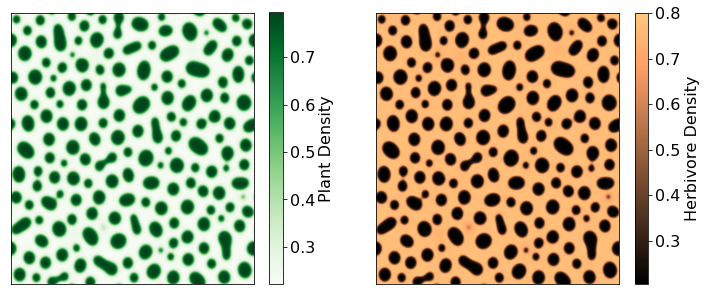

In [14]:
plot_state(us[-1])

In [17]:
anim = animate(us, density_scale='tight')
anim.save('test.mp4', writer='imagemagick', fps=24)
HTML(anim.to_html5_video())

# Figure 2

In [49]:
model_params = {
    'α': 4,
    'β' : .1,
    'κ' : .05,
    'λ' : 1,
    'D0' : 1,
    'stocking_rate': .825
}

spatial_params ={
    'x_left': 0,
    'Δx': 1,
    'spatial_points': 128
}
time_params = {
    't0': 0,
    'Δt': 0.02
}

params = {**model_params, **spatial_params, ** time_params}

model = Model(**params)
steps = 200_000
stride = 500
print(f'Storing {steps//stride} snapshots...')
us = []
for t, u in islice(model.simulate(), 0, steps, stride):
    print(f'{t/(model.Δt*steps)*100:.2f}%' + ' '*50, end='\r')
    us.append(u)
print('Complete')

Storing 400 snapshots...
Complete                                                


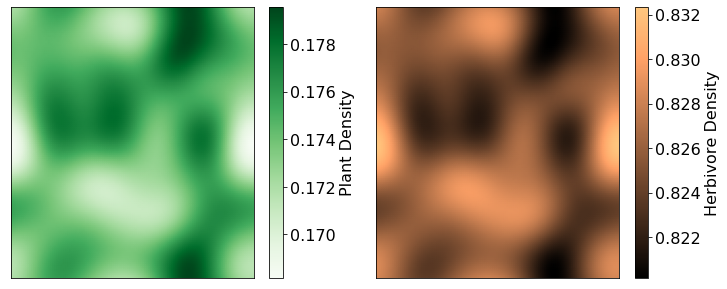

In [48]:
plot_state(us[-1])

In [ ]:
model_params = {
    'α': 4,
    'β' : .1,
    'κ' : .05,
    'λ' : 1,
    'D0' : 1
}

spatial_params ={
    'x_left': 0,
    'Δx': 1,
    'spatial_points': 512
}
time_params = {
    't0': 0,
    'Δt': 0.02
}

base_params = {**model_params, **spatial_params, ** time_params}

stocking_rates = [.55, .675, .825]
steps = 200_000
stride = 500
print(f'Storing {steps//stride} snapshots...')

us_list = []
for stocking_rate in stocking_rates:
    params = {**base_params, 'stocking_rate': stocking_rate}
    model = Model(**params)
    us = []
    for t, u in islice(model.simulate(), 0, steps, stride):
        print(f'rate={stocking_rate}\t{t/(model.Δt*steps)*100:.2f}%' + ' '*50, end='\r')
        us.append(u)
    us_list.append(us)
print('Complete' + ' '*50)

Storing 400 snapshots...


In [ ]:
h_min = min(np.min(u[1]) for us in us_list for u in us)
h_max = max(np.max(u[1]) for us in us_list for u in us)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plot_params = {'shading': 'gouraud'}

p_min = min(np.min(u[0]) for u in us_list[0])
p_max = max(np.max(u[0]) for u in us_list[0])
p_map0 = axes[0][0].pcolormesh(us_list[0][0][0], cmap='Greens', **plot_params, vmin=p_min, vmax=p_max)
p_min = min(np.min(u[0]) for u in us_list[1])
p_max = max(np.max(u[0]) for u in us_list[1])
p_map1 = axes[0][1].pcolormesh(us_list[1][-1][0], cmap='Greens', **plot_params, vmin=p_min, vmax=p_max)
p_min = min(np.min(u[0]) for u in us_list[2])
p_max = max(np.max(u[0]) for u in us_list[2])
p_map2 = axes[0][2].pcolormesh(us_list[1][-1][0], cmap='Greens', **plot_params, vmin=p_min, vmax=p_max)

h_min = min(np.min(u[1]) for u in us_list[0])
h_max = max(np.max(u[1]) for u in us_list[0])
h_map0 = axes[1][0].pcolormesh(us_list[0][0][1], cmap='copper', **plot_params, vmin=h_min, vmax=h_max)
h_min = min(np.min(u[1]) for u in us_list[1])
h_max = max(np.max(u[1]) for u in us_list[1])
h_map1 = axes[1][1].pcolormesh(us_list[1][-1][1], cmap='copper', **plot_params, vmin=h_min, vmax=h_max)
h_min = np.min(us_list[2][-1][1])
h_max = np.max(us_list[2][-1][1])
h_map2 = axes[1][2].pcolormesh(us_list[1][-1][1], cmap='copper', **plot_params, vmin=h_min, vmax=h_max)

fig.colorbar(p_map0, ax=axes[0][0], label='Plant Density')
fig.colorbar(p_map1, ax=axes[0][1], label='Plant Density')
fig.colorbar(p_map2, ax=axes[0][2], label='Plant Density')
fig.colorbar(h_map0, ax=axes[1][0], label='Herbivore Density')
fig.colorbar(h_map1, ax=axes[1][1], label='Herbivore Density')
fig.colorbar(h_map2, ax=axes[1][2], label='Herbivore Density')

for row, rate in zip(axes, stocking_rates):
    for ax in row:
        ax.set_xticks([])
        ax.set_yticks([])

for ax, rate in zip(axes[0], stocking_rates):
    ax.set_title(f'$\\langle h \\rangle = {rate}$')

def animate(i):
    print(f'{i}/{len(us)}' + ' '*100, end='\r')
    p_map0.set_array(us_list[0][i][0].flatten())
    h_map0.set_array(us_list[0][i][1].flatten())
    p_map1.set_array(us_list[1][i][0].flatten())
    h_map1.set_array(us_list[1][i][1].flatten())
    p_map2.set_array(us_list[2][i][0].flatten())
    h_map2.set_array(us_list[2][i][1].flatten())
    return p_map0,


# Init only required for blitting to give a clean slate.
def init():
    p_map0.set_array(us_list[0][0][0].flatten())
    h_map0.set_array(us_list[0][0][1].flatten())
    p_map1.set_array(us_list[1][0][0].flatten())
    h_map1.set_array(us_list[1][0][1].flatten())
    p_map2.set_array(us_list[2][0][0].flatten())
    h_map2.set_array(us_list[2][0][1].flatten())
    return p_map0,

anim = animation.FuncAnimation(fig, animate, range(len(us_list[0])), init_func=init, interval=1/24*1000, blit=True)
# anim.save('fig2_reproduced.mp4', writer='imagemagick', fps=24)
HTML(anim.to_html5_video())
# plt.close()

# 5b

In [15]:
model_params = {
    #'α': 4,
    'β' : .1,
    'κ' : .05,
    'λ' : 1,
    'D0' : 1#, 'stocking_rate': .825
}

spatial_params ={
    'x_left': 0,
    'Δx': 1,
    'spatial_points': 1024
}
time_params = {
    't0': 0,
    'Δt': 0.02
}

params = {**model_params, **spatial_params, ** time_params}

params['α'] = np.outer(np.linspace(2.5, 5.0, params['spatial_points']), 
                       np.ones(params['spatial_points']))

params['stocking_rate'] = np.outer(np.ones(params['spatial_points']),
                                   np.linspace(.4, .9, params['spatial_points']))

model = Model(**params)
# give alpha a gradent in the Y direction


steps = 20_000
stride = 50
print(f'Storing {steps//stride} snapshots...')
us = []
for t, u in islice(model.simulate(), 0, steps, stride):
    print(f'{t/(model.Δt*steps)*100:.2f}%' + ' '*50, end='\r')
    us.append(u)
print('Complete')

Storing 400 snapshots...
Complete                                                


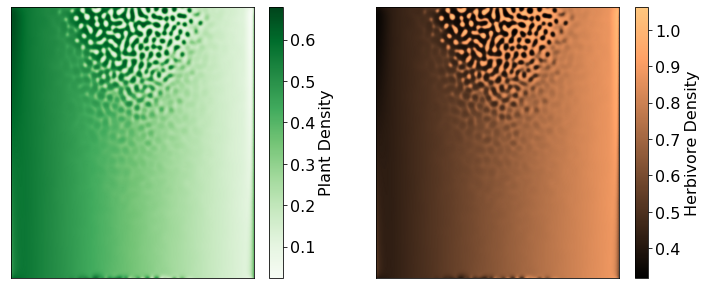

In [16]:
plot_state(us[-1])

In [17]:
anim = animate(us, density_scale='tight')
anim.save('fig5_reproduced.mp4', writer='imagemagick', fps=24)
HTML(anim.to_html5_video())